# Data Preparation

In [53]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split

In [134]:
path = 'C:/Users/Meier/Institut für Statistik Dropbox/Johanna Meier/Structural Breaks + DL/Application/Data/'

In [190]:
#data_name = 'Frequency of grid/gridfreqs_2022-10-01.csv'
data_name = 'Frequency of grid/gridfreqs_2022-10-08.csv'

In [191]:
df = pd.read_csv(path+data_name)
df.columns = ['Date', 'Loc1', 'Loc2']
df['Date'] = pd.to_datetime(df['Date'])

In [151]:
#print(df[df['Date']=='2022-10-01 19:07:00'])
#print(df[df['Date']=='2022-10-01 16:47:00'])
print(df[df['Date']=='2022-10-08 20:10:00'])
print(df[df['Date']=='2022-10-08 20:15:00'])

                    Date        Loc1       Loc2
1210 2022-10-08 20:10:00  237.039833  111.46748
                    Date        Loc1        Loc2
1215 2022-10-08 20:15:00  237.784283  111.736915


Generate time lags and split data:

In [192]:
def generate_time_lags(df, col_name, n_lags):
    df_n = df[[col_name]].copy()
    for n in range(1, n_lags + 1):
        df_n[f"lag{n}"] = df_n[col_name].shift(n)
    df_n = df_n.iloc[n_lags:]
    return df_n.reset_index(drop=True)

In [193]:
def feature_label_split(df, target_col):
    y = df[[target_col]]
    X = df.drop(columns=[target_col])
    return X, y

In [194]:
def split_data(df, path, train_size, lags=1):
    
    for i in range(1,len(df.columns)):
        # get and save splits
        df_generated = generate_time_lags(df, df.columns[i], lags)
        X, y = feature_label_split(df_generated, df.columns[i])
        X_train, X_rest, y_train, y_rest = train_test_split(X, y, train_size=train_size, shuffle=False)
        X_val, X_test, y_val, y_test = train_test_split(X_rest, y_rest, test_size=2/3, shuffle=False)
        print(X_train.shape, X_val.shape, X_test.shape, y_train.shape, y_val.shape, y_test.shape)
        plt.plot(X_train)
        plt.plot(np.concatenate((np.tile(np.nan,X_train.shape),X_val),axis=0))
        plt.plot(np.concatenate((np.tile(np.nan,X_train.shape), np.tile(np.nan,X_val.shape),X_test),axis=0))
        plt.show()
        #np.savez(path+'Frequency of grid/gridfreqs_%s_%s.npz' %(str(df['Date'].dt.date[0]),df.columns[i]), X_train=X_train, X_val=X_val, X_test=X_test, y_train=y_train, y_val=y_val, y_test=y_test)
    
    del df

(1295, 1) (48, 1) (96, 1) (1295, 1) (48, 1) (96, 1)


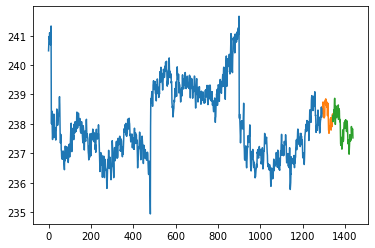

(1295, 1) (48, 1) (96, 1) (1295, 1) (48, 1) (96, 1)


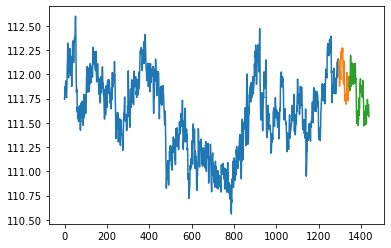

In [195]:
split_data(df,path,0.9)